# 실습

## 12.01

In [1]:
class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def __str__(self) :
        return "(%d, %d)" % (self.x, self.y)

class Point3D(Point):
    def __init__(self,x,y,z):
        super().__init__(x, y)
        self.z = z
        
    def __str__(self) :
        return "(%d, %d, %d)" % (self.x, self.y, self.z)

In [2]:
my_point = Point3D(1,2,3)
print(my_point)

(1, 2, 3)


## 12.03

In [3]:
import cmath # complex math 모듈 
class Function:
    def __init__(self):
        pass
    
    def value(self, x):
        pass

class Quadratic(Function):
    def __init__(self, a, b, c):
        self.a=a
        self.b=b
        self.c=c

    def value(self, x):
        return (self.a)*x**2+(self.b)*x+(self.c)
        
    def get_roots(self):
        d = (self.b**2) - (4*self.a*self.c)

        sol1 = (-self.b-cmath.sqrt(d))/(2*self.a)
        sol2 = (-self.b+cmath.sqrt(d))/(2*self.a)

        print(f'solution: {sol1}, {sol2}')

In [4]:
e = Quadratic(1, 5, 6)
e.get_roots()

solution: (-3+0j), (-2+0j)


## 13장 내용(벽돌깨기 게임)

### Sprite 클래스 정의

In [5]:
from tkinter import * 

class Sprite():
    def __init__(self, canvas, item):
        self.canvas = canvas # 캔버스 객체
        self.item = item # 캔버스 안에 있는 도형의 식별 번호
        self.speedx, self.speedy = 3, 3 # 방향 속도
        self.x, self.y = 0, 0 # 현재 좌표
        
    # 도형의 위치와 크기를 반환한다. 
    def get_coords(self):
        return self.canvas.coords(self.item)
        
    # 도형의 위치를 반환한다.
    def get_position(self):
        pos = self.canvas.coords(self.item)
        x = pos[0]
        y = pos[1]
        return x, y
        
    # 객체의 상태를 변경한다. 
    def update(self):
        self.x += self.speedx
        self.y += self.speedy

    # 객체를 움직인다. 
    def move(self):
        self.canvas.move(self.item, self.speedx, self.speedy)

    # 객체를 캔버스에서 삭제한다. 
    def delete(self):
        self.canvas.delete(self.item)

### Ball 클래스를 정의/충돌을 처리

In [6]:
class Ball(Sprite):
    def __init__(self, canvas, x, y, radius):
        self.radius = radius
        item = canvas.create_oval(x-self.radius, y-self.radius,
                                  x+self.radius, y+self.radius,fill='red')
        self.x = x
        self.y = y
        super().__init__(canvas, item)

    def update(self):
        x, y = self.get_position()
        width = self.canvas.winfo_width()

        # 벽에 부딪히면 방향을 변경한다. 
        if x <= 0 or x >= width:
            self.speedx *= -1 # x 방향 변경
        if y <= 0:
            self.speedy *= -1 # y 방향 변경
    
    # 충돌을 처리하는 메소드
    # Ball과 충돌이 일어난 객체들의 리스트가 매개변수로 전달된다. 
    def collide(self, obj_list):
        x, y = self.get_position()
        
        # 공이 패들이나 벽돌에 맞으면 y방향을 반대로 한다. 
        if len(obj_list):
            self.speedy *= -1
        for obj in obj_list:
            if isinstance(obj, Brick):
                obj.handle_collision()

### 패들을 화면에 그려보자.

In [7]:
class Paddle(Sprite):
    def __init__(self, canvas, x, y):
        self.width = 100 
        self.height = 20
        item = canvas.create_rectangle(x - self.width / 2, y - self.height / 2,
                                       x + self.width / 2, y + self.height / 2,
                                       fill='white')
        super().__init__(canvas, item) # 부모 클래스 생성자 호출
        self.x = x # 현재 위치 저장
        self.y = y

    # 패들을 dx, dy만큼 이동한다. 키보드 이벤트에서 호출된다. 
    def move(self, dx, dy):
        self.x = self.x + dx
        self.y = self.y + dy
        self.canvas.move(self.item, dx, dy)

### 벽돌을 화면에 그려보자.

In [8]:
class Brick(Sprite):
    def __init__(self, canvas, x, y):
        self.width = 52
        self.height = 25
        item = canvas.create_rectangle(x - self.width / 2, y - self.height / 2,
                                       x + self.width / 2, y + self.height / 2,
                                       fill='yellow', tags='brick')
        super().__init__(canvas, item)

    # 벽돌과 공이 충돌하면 벽돌을 삭제한다. 
    def handle_collision(self):
        self.delete()

### 화면을 작성해보자 / 여러 개의 벽돌을 생성하자. / 패들을 움직이자. / 충돌을 처리하자.

In [9]:
class BrickBreaker(Frame): # help(Frame)
    def __init__(self, root):
        super().__init__(root)
        self.width = 640
        self.height = 480
        self.canvas = Canvas(self, bg='blue',
                             width=self.width,
                             height=self.height)
        self.canvas.pack()
        self.pack()
        
        # shapes에는 화면에 있는 모든 객체가 저장된다. 
        # 키는 도형 식별 번호이고 값은 객체이다. 
        self.shapes = {}

        # 패들 객체를 생성하고 shapes에 저장한다. 
        self.paddle = Paddle(self.canvas, self.width/2, 450)
        self.shapes[self.paddle.item] = self.paddle

        # Ball 객체를 생성한다. 
        self.ball = Ball(self.canvas, 310, 200, 10) # x, y, radius

        # Brick 객체를 2차원 모양으로 생성한다. 
        for r in range(1, 4):
            for c in range(1, 10):
                brick = Brick(self.canvas, c*60, r*30)
                # Brick 객체를 shapes에 저장한다. 
                self.shapes[brick.item] = brick
        
        # 캔버스가 키보드 이벤트를 받을 수 있도록 설정한다. 
        self.canvas.focus_set()

        # 화살표키와 스페이스키에 이벤트를 붙인다.
        self.canvas.bind('<Left>',
            lambda _: self.paddle.move(-10, 0))
        self.canvas.bind('<Right>',
            lambda _: self.paddle.move(10, 0))
        self.canvas.bind('<space>', lambda _: self.start())

    def start(self):
        self.game_loop()
    
    # 게임 루프를 작성한다. 
    def game_loop(self):
        coords = self.ball.get_coords() # Ball 객체의 위치를 구한다. 
        # 겹치는 모든 도형을 찾는다. 식별 번호가 저장된다. 
        items = self.canvas.find_overlapping(*coords)
        
        # 겹치는 도형의 식별 번호로 객체를 찾아서 리스트에 저장한다. 
        objects = [self.shapes[x] for x in items if x in self.shapes]

        # 충돌 처리 메소드를 호출한다. 
        self.ball.collide(objects)

        self.ball.update()
        self.ball.move()
        # game_loop()를 50밀리초 후에 호출한다. 
        self.after(50, self.game_loop)

In [10]:
window = Tk()
game = BrickBreaker(window)
window.mainloop()

![게임](벽돌깨기.png)

# 제 14장 넘파이

## 직선 그래프

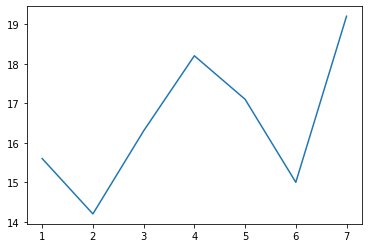

In [11]:
import matplotlib.pyplot as plt
X = [1, 2, 3, 4, 5, 6, 7]
Y = [15.6, 14.2, 16.3, 18.2, 17.1, 15.0, 19.2]
plt.plot(X, Y)
plt.show()

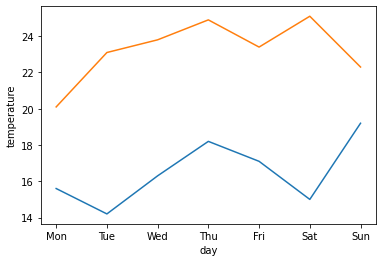

In [12]:
X = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] 
Y1 = [15.6, 14.2, 16.3, 18.2, 17.1, 15.0, 19.2]
Y2 = [20.1, 23.1, 23.8, 24.9, 23.4, 25.1, 22.3]
plt.plot(X, Y1, X, Y2) # plot()에 2개의 쌍을 보낸다. 
plt.xlabel("day")
plt.ylabel("temperature")
plt.show()

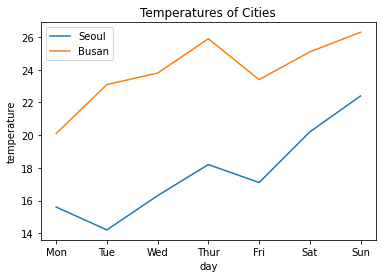

In [13]:
X = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"] 
Y1 = [15.6, 14.2, 16.3, 18.2, 17.1, 20.2, 22.4]
Y2 = [20.1, 23.1, 23.8, 25.9, 23.4, 25.1, 26.3]
plt.plot(X, Y1, label="Seoul") # 분리시켜서 그려도 됨
plt.plot(X, Y2, label="Busan") # 분리시켜서 그려도 됨
plt.xlabel("day")
plt.ylabel("temperature")
plt.legend(loc="upper left")
plt.title("Temperatures of Cities")
plt.show()

## 점 그래프

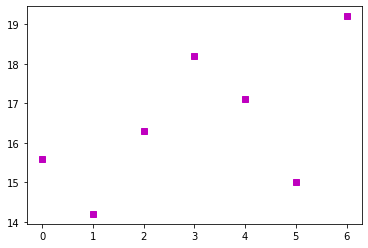

In [14]:
Y = [15.6, 14.2, 16.3, 18.2, 17.1, 15.0, 19.2]
plt.plot(Y, "sm")
plt.show()

## 막대 그래프

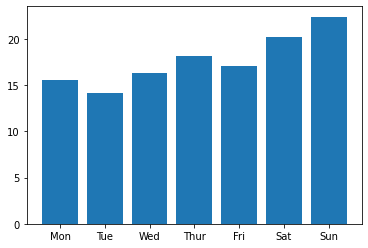

In [15]:
X = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"] 
Y = [15.6, 14.2, 16.3, 18.2, 17.1, 20.2, 22.4]
plt.bar(X, Y)
plt.show()

## 넘파이 배열

In [16]:
import numpy as np

# 우리가 화씨 온도로 저장된 뉴욕의 기온 데이터를 얻었다고 하자. 
ftemp = [63, 73, 80, 86, 84, 78, 66, 54, 45, 63]

#이것을 넘파이로 배열로 변환하려면 다음과 같이 넘파이 모듈의 array() 
#함수를 호출한다. 
F = np.array(ftemp)
print(F)

(F-32)*5/9 # 배열의 모든 요소에 이 연산이 적용된다.

[63 73 80 86 84 78 66 54 45 63]


array([17.22222222, 22.77777778, 26.66666667, 30.        , 28.88888889,
       25.55555556, 18.88888889, 12.22222222,  7.22222222, 17.22222222])

### 배열 간 연산

In [17]:
A = np.array([1, 2, 3, 4])
B = np.array([5, 6, 7, 8])
result = A + B # 넘파이 배열에 + 연산이 적용된다. 
result

array([ 6,  8, 10, 12])

In [18]:
a = np.array([0, 9, 21, 3])
a < 10 # 브로드캐스팅

array([ True,  True, False,  True])

In [19]:
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(b)
b[0][2]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


3

## Lab: BMI 계산하기

![BMI 계산하기](BMI.png)

In [20]:
heights = [1.83, 1.76, 1.69, 1.86, 1.77, 1.73]
weights = [86, 74, 59, 95, 80, 68]

np_heights = np.array(heights)
np_weights = np.array(weights)

bmi = np_weights/(np_heights**2)
print(bmi)

[25.68007405 23.88946281 20.65754    27.45982194 25.53544639 22.72043837]


## arange()

In [21]:
A = np.arange(1, 10, 2)
A

array([1, 3, 5, 7, 9])

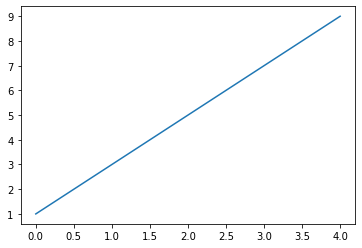

In [22]:
plt.plot(A)
plt.show()

## 그래프 꾸미기  
1. color  
: b blue  g green  r red  c cyan  m magenta  y yellow  k black  w white  
2. line  
: - solid line  -- dashed line  : dotted line  -. dash-dot line  
3. point  
: ., o 〮, ●  
: ^, v, <, > ▲, ▼, ◀, ▶  
: s square ■  
: p 오각형(pentagon)   
: h, H 육각형(hexagon)1, 육각형2   
: * ★  
: + ＋  
: x, X ×, 채워진 ×  
: D, d Diamond(◆), 얇은 다이아몬드  

fmt = '[color][line_style][marker]'  
plt.plot([x,] y [,fmt])

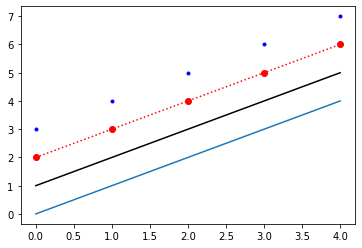

In [23]:
x = np.arange(0, 5, 1)
y1 = x
y2 = x + 1
y3 = x + 2
y4 = x + 3

plt.plot(x, y1, 
         x, y2, 'k-',
         x, y3, 'ro:', 
         x, y4, '.b')
plt.show()

## linspace()

In [24]:
A = np.linspace(0, 10, 100)
A

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

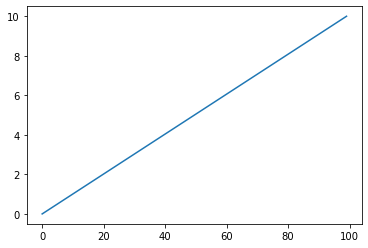

In [25]:
plt.plot(A)
plt.show()

## 3차원 그래프

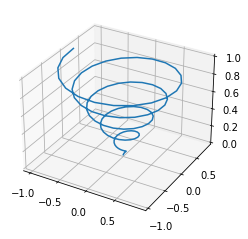

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3차원 축(axis)을 얻는다. 
axis = plt.axes(projection='3d')

# 3차원 데이터를 넘파이 배열로 생성한다. 
Z = np.linspace(0, 1, 100)
X = Z * np.sin(30 * Z)
Y = Z * np.cos(30 * Z)

# 3차원 그래프를 그린다. 
axis.plot3D(X, Y, Z)
plt.show()

## 균일 분포 난수 생

In [27]:
np.random.seed(100)

# 시드가 설정되면 다음 문장을 수행하여 [0, 1)인 5개의 난수를 얻는다. 

np.random.rand(5)

array([0.54340494, 0.27836939, 0.42451759, 0.84477613, 0.00471886])

In [28]:
np.random.rand(5, 3)

array([[0.12156912, 0.67074908, 0.82585276],
       [0.13670659, 0.57509333, 0.89132195],
       [0.20920212, 0.18532822, 0.10837689],
       [0.21969749, 0.97862378, 0.81168315],
       [0.17194101, 0.81622475, 0.27407375]])

### 정규 분포 난수 생성

In [29]:
np.random.randn(5)

array([ 0.67272081, -0.10441114, -0.53128038,  1.02973269, -0.43813562])

In [30]:
# 난수로 채워진 5×4 크기의 2차원 배열을 생성하려면 다음과 같이 적어준다
np.random.randn(5, 4)

array([[-1.11831825,  1.61898166,  1.54160517, -0.25187914],
       [-0.84243574,  0.18451869,  0.9370822 ,  0.73100034],
       [ 1.36155613, -0.32623806,  0.05567601,  0.22239961],
       [-1.443217  , -0.75635231,  0.81645401,  0.75044476],
       [-0.45594693,  1.18962227, -1.69061683, -1.35639905]])

In [31]:
# 위의 정규 분포는 평균값이 0이고 표준편차가 1.0이다. 
# 만약 평균값과 표준편차를 다르게 하려면 다음과 같이 하면 된다. 
m, sigma = 10, 2
m + sigma*np.random.randn(5)

array([ 7.53513097,  8.91112168,  8.66365653, 10.01462913,  8.77412253])

In [32]:
mu, sigma = 0, 0.1 # 평균과 표준 편차
np.random.normal(mu, sigma, 5)

array([ 0.12997481, -0.17330956, -0.09833101,  0.03575078, -0.16135785])

## Lab: 잡음이 들어간 직선 그리기

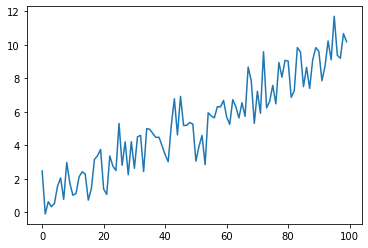

In [33]:
import numpy as np
import matplotlib.pyplot as plt

pure = np.linspace(1, 10, 100) # 1부터 10까지 100개의 데이터 생성
noise = np.random.normal(0, 1, 100) # 평균이 0이고 표준편차가 1인 100개의 난수 생성

# 넘파이 배열 간 덧셈 연산, 요소별로 덧셈이 수행된다. 
signal = pure + noise

# 선 그래프를 그린다. 
plt.plot(signal)
plt.show()

## 넘파이 내장 함수

In [34]:
A = np.array([0, 1, 2, 3])
10 * np.sin(A)

array([0.        , 8.41470985, 9.09297427, 1.41120008])

### 예제

In [35]:
import numpy as np
scores = np.array([[99, 93, 60], [98, 82, 93], [93, 65, 81], [78, 82, 81]])
scores.sum()

1005

In [36]:
scores.min()

60

In [37]:
scores.max()

99

In [38]:
scores.mean()

83.75

In [39]:
scores.std()

11.769487386175038

In [40]:
scores.var()

138.52083333333334

In [41]:
# 행이나 열 단위로 계산 가능 (axis = 0:행, axis=1:열)
scores.mean(axis=0)

array([92.  , 80.5 , 78.75])

## 히스토그램

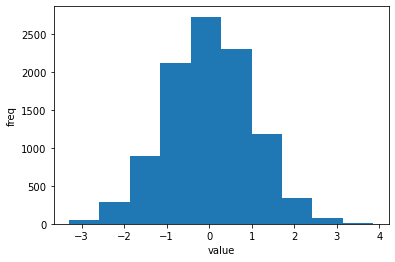

In [42]:
import matplotlib.pyplot as plt
import numpy as np

numbers = np.random.normal(size=10000)

plt.hist(numbers)
plt.xlabel("value")
plt.ylabel("freq")
plt.show()

## Lab: 정규 분포 그래프 그리기

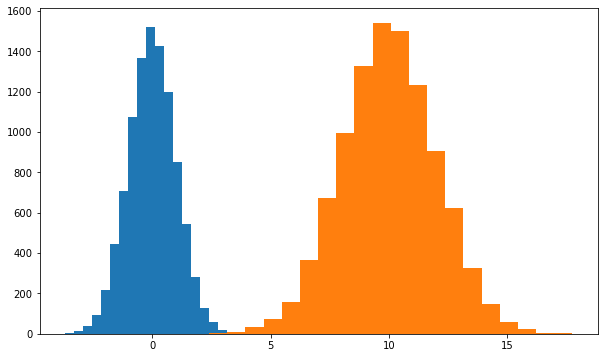

In [43]:
m, sigma = 10, 2
Y1 = np.random.randn(10000)
Y2 = m+sigma*np.random.randn(10000)

plt.figure(figsize=(10,6)) # 그래프의 크기 설정
plt.hist(Y1, bins=20)
plt.hist(Y2, bins=20)
plt.show()

## Lab: 싸인 함수 그리기

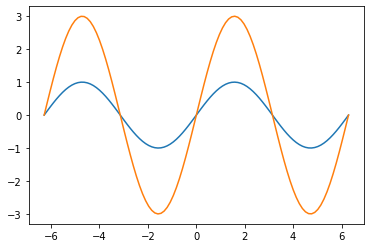

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# -2π에서 +2π까지 100개의 데이터를 균일하게 생성한다. 
X = np.linspace(-2 * np.pi, 2 * np.pi, 100)

# 넘파이 배열에 sin() 함수를 적용한다. 
Y1 = np.sin(X)
Y2 = 3 * np.sin(X)

plt.plot(X, Y1, X, Y2)
plt.show()

## Lab: MSE 계산하기

In [45]:
import numpy as np

ypred = np.array([1, 0, 0, 0, 0])
y = np.array([0, 1, 0, 0, 0])
n = 5
MSE = (1/n) * np.sum(np.square(ypred-y))
print(MSE)

0.4


## 인덱싱과 슬라이싱

In [46]:
grades = np.array([ 88, 72, 93, 94])

# 예를 들어서 1에서 2까지의 슬라이스는 다음과 같이 얻을 수 있다. 
grades[1:3]

array([72, 93])

In [47]:
# 다음과 같이 시작 인덱스나 종료 인덱스는 생략이 가능하다. 
y[:2]

array([0, 1])

### 논리적인 인덱싱

In [48]:
ages = np.array([18, 19, 25, 30, 28])

# ages에서 20살 이상인 사람만 고르려고 하면 다음과 같은 조건식을 써준다. 
y = ages > 20
y

array([False, False,  True,  True,  True])

In [49]:
# 논리적인 인덱싱
ages[ages > 20]

array([25, 30, 28])

### 2차원 배열의 슬라이싱

In [50]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a[0:2, 1:3]

array([[2, 3],
       [5, 6]])

In [51]:
a[0:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [52]:
a[0:2][0:1]

array([[1, 2, 3]])

In [53]:
a[0:2, 0:1]

array([[1],
       [4]])

### 2차원 배열의 논리적인 인덱싱

In [54]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a > 5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [55]:
a[a > 5]

array([6, 7, 8, 9])

## Lab: 직원들의 월급 인상하기

In [56]:
import numpy as np
salary = np.array([220, 250, 230])
salary = salary + 100
salary

array([320, 350, 330])

In [57]:
salary = np.array([220, 250, 230])
salary = salary * 2
print(salary)
salary > 450

[440 500 460]


array([False,  True,  True])

## Lab: 함수의 그래프 그리기

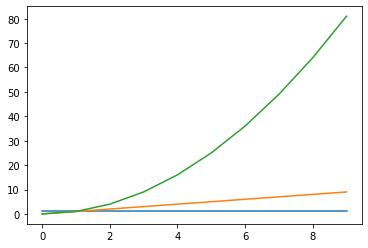

In [58]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 10)

Y1 = np.ones(10) # ones()는 0으로 이루어진 넘파이 배열 생성
Y2 = X 
Y3 = X**2 

# 3개의 그래프를 하나의 축에 그린다. 
plt.plot(X, Y1, X, Y2, X, Y3)
plt.show()

## 전치 행렬 계산하기

In [59]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

x.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [60]:
x.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

## 역행렬 계산하기

In [61]:
x = np.array([[1,2],[3,4]]) 
y = np.linalg.inv(x) 
y 

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [62]:
# 행렬의 내적 계산
np.dot(x, y)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

## 선형방정식 풀기

In [63]:
a = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x = np.linalg.solve(a, b)
x

array([2., 3.])